   # Sentiment Analysis of Tweets and checking correlation between daily stock change and Sentiments:
<br />
<center>
<img src = sentiment2.jpg width = 600 />
</center>

**Libraries that are used in this project:**

In [2]:

import tweepy
import datetime as dt
from textblob import TextBlob
import json
import string
import re
import numpy as np
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))
from enchant.checker import SpellChecker
import GetOldTweets3 as got

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhujb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


**Extracting tweets from Twitter Application using Tweepy:**

In [4]:
consumer_key="OKWpEYIKLuFBg91ZS17fCmmqn"
consumer_secret="3hXnqpYcU6lVWA5koeK1VUTWNOZYB2coCOnT3AqLvCv2fciBpX"
access_token="1246061088946479109-Hj33v0KWnHGBYCHau255V3Ua0qLxQP"
access_token_secret="DDVOhmut6K8ebP29zv7ljlksk8Bu3KWOl1YVefSFWdGs1"
#app_only_auth: true
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")
    print(api)
    
search_terms = ['Economy']
def stream_tweets(search_term):
    data = [] # empty list to which tweet_details obj will be added
    counter = 0 # counter to keep track of each iteration
    for tweet in tweepy.Cursor(api.search, q='\"{}\" -filter:retweets'.format(search_term), count=10, lang='en', tweet_mode='extended').items():
        tweet_details = {}
        tweet_details['name'] = tweet.user.screen_name
        tweet_details['tweet'] = tweet.full_text
        tweet_details['retweets'] = tweet.retweet_count
        tweet_details['location'] = tweet.user.location
        tweet_details['created'] = tweet.created_at.strftime("%d-%b-%Y")
        tweet_details['followers'] = tweet.user.followers_count
        tweet_details['is_user_verified'] = tweet.user.verified
        data.append(tweet_details)
        
        counter += 1
        if counter == 2000:
            break
        else:
            pass
    with open('{}.json'.format(search_term), 'w') as f:
        json.dump(data, f)
    print('done!')

Authentication OK


In [5]:
if __name__ == "__main__":
    print('Starting to stream...')
    for search_term in search_terms:
        stream_tweets(search_term)
    print('finished!')

Starting to stream...
done!
finished!


**Reading data in JSON file into pandas DataFrame:**

In [8]:
eco_df = pd.read_json('Economy.json', orient='records')
eco_df

,name,tweet,retweets,location,created,followers,is_user_verified
0,iwillvoteagain,He is anti trump. That is the problem. He is b...,0,"Pennsylvania, USA",22-Apr-2020,457,False
1,volfancpa,@DC_Draino When the crap economy wrecks these ...,0,,22-Apr-2020,22,False
2,RMCFTommy,Y’all really spending money on the opposite se...,0,Texas,22-Apr-2020,7127,False
3,profgcs,Trump reelection bus lends it's support to the...,0,,22-Apr-2020,9,False
4,Hot_McBastards,@Newsweek Other countries are putting their ec...,0,Nowhere,22-Apr-2020,43,False
...,...,...,...,...,...,...,...
1995,Sami51162323,"@The_realist_31 @PeterSweden7 Well, if you put...",0,,22-Apr-2020,63,False
1996,mcclelef,Hope for seniors in this economy https://t.co/...,0,"Elizabethtown, PA",22-Apr-2020,179,False
1997,OuterspaceGRL79,Zero new cases in/from Victoria today. Keep in...,0,"Melbourne, Aus.",22-Apr-2020,419,False
1998,Schtaunkhauser,@Fuck_DS9 Great. So open up the economy again...,0,New Vancouver,22-Apr-2020,1039,False


In [9]:
eco_df.shape

(2000, 7)

In [10]:
print(f" Data Available since {eco_df.created.min()}")
print(f" Data Available upto {eco_df.created.max()}")

 Data Available since 22-Apr-2020
 Data Available upto 22-Apr-2020


In [11]:
print(f" Maximum number of retweets {eco_df.retweets.max()}")
print(f" Minimum number of retweets {eco_df.retweets.min()}")

 Maximum number of retweets 250
 Minimum number of retweets 0


In [12]:
#lets see the tweet which has the maximum retweet count
# enter the max tweet count below to check the tweet
eco_df.loc[eco_df['retweets']==250,'tweet'].values

array(['It’s 2020 and the economists are running epidemic models while the epidemiologists run the economy.'],
      dtype=object)

**Adding sentiment column to the dataframe based on polarity of Sentiments of tweets:**

In [13]:
eco_df['sentiment'] = eco_df['tweet'].map(lambda text: "positive" if TextBlob(text).sentiment.polarity>0 else "negative" if TextBlob(text).sentiment.polarity<0 else "neutral")

In [14]:
#eco_df['sentiment'].drop
eco_df

,name,tweet,retweets,location,created,followers,is_user_verified,sentiment
0,iwillvoteagain,He is anti trump. That is the problem. He is b...,0,"Pennsylvania, USA",22-Apr-2020,457,False,neutral
1,volfancpa,@DC_Draino When the crap economy wrecks these ...,0,,22-Apr-2020,22,False,negative
2,RMCFTommy,Y’all really spending money on the opposite se...,0,Texas,22-Apr-2020,7127,False,positive
3,profgcs,Trump reelection bus lends it's support to the...,0,,22-Apr-2020,9,False,neutral
4,Hot_McBastards,@Newsweek Other countries are putting their ec...,0,Nowhere,22-Apr-2020,43,False,negative
...,...,...,...,...,...,...,...,...
1995,Sami51162323,"@The_realist_31 @PeterSweden7 Well, if you put...",0,,22-Apr-2020,63,False,neutral
1996,mcclelef,Hope for seniors in this economy https://t.co/...,0,"Elizabethtown, PA",22-Apr-2020,179,False,neutral
1997,OuterspaceGRL79,Zero new cases in/from Victoria today. Keep in...,0,"Melbourne, Aus.",22-Apr-2020,419,False,positive
1998,Schtaunkhauser,@Fuck_DS9 Great. So open up the economy again...,0,New Vancouver,22-Apr-2020,1039,False,positive


**Counting the number of sentiments:**

In [15]:
eco_df.sentiment.value_counts()

positive    1016
negative     537
neutral      447
Name: sentiment, dtype: int64

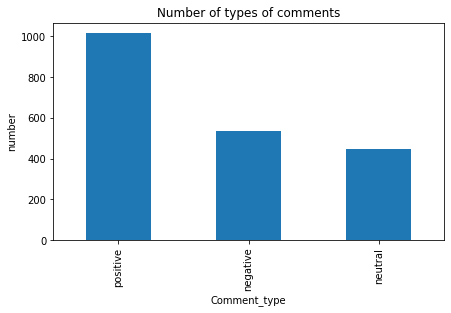

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
eco_df['sentiment'].replace({'positive','neutral','negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment_type');
plt.ylabel('number');

**Added a new column calculating the length of tweet:**

In [17]:
eco_df['tweet_len'] = [len(t) for t in eco_df.tweet]
eco_df

,name,tweet,retweets,location,created,followers,is_user_verified,sentiment,tweet_len
0,iwillvoteagain,He is anti trump. That is the problem. He is b...,0,"Pennsylvania, USA",22-Apr-2020,457,False,neutral,116
1,volfancpa,@DC_Draino When the crap economy wrecks these ...,0,,22-Apr-2020,22,False,negative,235
2,RMCFTommy,Y’all really spending money on the opposite se...,0,Texas,22-Apr-2020,7127,False,positive,69
3,profgcs,Trump reelection bus lends it's support to the...,0,,22-Apr-2020,9,False,neutral,263
4,Hot_McBastards,@Newsweek Other countries are putting their ec...,0,Nowhere,22-Apr-2020,43,False,negative,290
...,...,...,...,...,...,...,...,...,...
1995,Sami51162323,"@The_realist_31 @PeterSweden7 Well, if you put...",0,,22-Apr-2020,63,False,neutral,116
1996,mcclelef,Hope for seniors in this economy https://t.co/...,0,"Elizabethtown, PA",22-Apr-2020,179,False,neutral,56
1997,OuterspaceGRL79,Zero new cases in/from Victoria today. Keep in...,0,"Melbourne, Aus.",22-Apr-2020,419,False,positive,116
1998,Schtaunkhauser,@Fuck_DS9 Great. So open up the economy again...,0,New Vancouver,22-Apr-2020,1039,False,positive,159


**Determining the max and min length of tweet in dataframe:**

In [18]:
print(f" Maximum length of tweet {eco_df.tweet_len.max()}")
print(f" Minimum length of tweet {eco_df.tweet_len.min()}")

 Maximum length of tweet 950
 Minimum length of tweet 15


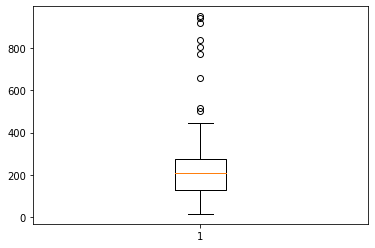

In [19]:
plt.boxplot(eco_df.tweet_len) # plot pre_clean_len column
plt.show()

**Function to clean the tweets remove word punctuation,urls,converting text in lower case:**

In [20]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets
pat2 = r'https?://[^ ]+'        # remove URL's from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URL's from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

# Calling the above function to clean our text and append it to a list and and then perform NLP:
<br />
<center>
<img src = nlp1.jpeg width = 600 />
</center>

In [21]:
clean_tweet_texts = [] 
for i in eco_df['tweet']:                                                                
    clean_tweet_texts.append(tweet_cleaner(i))
clean_tweet_texts

['he is anti trump that is the problem he is basing his decisions on how to kill pa economy',
 'when the crap economy wrecks these local economies and these clowns are some of the first to get pink slips it will be hard not to chuckle little bit they have sense of invincibility to bad economy they have no clue',
 'all really spending money on the opposite sex with this economy lol',
 'trump reelection bus lends it support to the lockdown liberation rally staged in phoenix az on apr never thought see the trump campaign plan and coordinate rebellion against our government failedstate',
 'other countries are putting their economy into cryostasis mortgage freezes rent freezes ubi for food and other essentials wait for vaccine we do not even know if there herd immunity for it that is possibility capitalism will recover there no coming back from death',
 'honestly don give shit about oil dropping don give fuck about the economy admist pandemic priorities',
 'threading rope through needle how

**Breaking the whole sentences into word tokens:**

In [22]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhujb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

**Performing the lammetization of word tokens:**

In [23]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1
df1

[['he',
  'is',
  'anti',
  'trump',
  'that',
  'is',
  'the',
  'problem',
  'he',
  'is',
  'basing',
  'his',
  'decision',
  'on',
  'how',
  'to',
  'kill',
  'pa',
  'economy'],
 ['when',
  'the',
  'crap',
  'economy',
  'wreck',
  'these',
  'local',
  'economy',
  'and',
  'these',
  'clown',
  'are',
  'some',
  'of',
  'the',
  'first',
  'to',
  'get',
  'pink',
  'slip',
  'it',
  'will',
  'be',
  'hard',
  'not',
  'to',
  'chuckle',
  'little',
  'bit',
  'they',
  'have',
  'sense',
  'of',
  'invincibility',
  'to',
  'bad',
  'economy',
  'they',
  'have',
  'no',
  'clue'],
 ['all',
  'really',
  'spending',
  'money',
  'on',
  'the',
  'opposite',
  'sex',
  'with',
  'this',
  'economy',
  'lol'],
 ['trump',
  'reelection',
  'bus',
  'lends',
  'it',
  'support',
  'to',
  'the',
  'lockdown',
  'liberation',
  'rally',
  'staged',
  'in',
  'phoenix',
  'az',
  'on',
  'apr',
  'never',
  'thought',
  'see',
  'the',
  'trump',
  'campaign',
  'plan',
  'and',

**After lammetization we combined the words again:**

In [24]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a)
clean_df1

['he is anti trump that is the problem he is basing his decision on how to kill pa economy',
 'when the crap economy wreck these local economy and these clown are some of the first to get pink slip it will be hard not to chuckle little bit they have sense of invincibility to bad economy they have no clue',
 'all really spending money on the opposite sex with this economy lol',
 'trump reelection bus lends it support to the lockdown liberation rally staged in phoenix az on apr never thought see the trump campaign plan and coordinate rebellion against our government failedstate',
 'other country are putting their economy into cryostasis mortgage freeze rent freeze ubi for food and other essential wait for vaccine we do not even know if there herd immunity for it that is possibility capitalism will recover there no coming back from death',
 'honestly don give shit about oil dropping don give fuck about the economy admist pandemic priority',
 'threading rope through needle how do we get th

**We added the sentiment column to our cleaned text tweets data:**

In [25]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
clean_df['target'] = eco_df.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
clean_df

,text,target
0,he is anti trump that is the problem he is bas...,neutral
1,when the crap economy wreck these local econom...,negative
2,all really spending money on the opposite sex ...,positive
3,trump reelection bus lends it support to the l...,neutral
4,other country are putting their economy into c...,negative
...,...,...
1995,well if you put human life after the economy n...,neutral
1996,hope for senior in this economy,neutral
1997,zero new case in from victoria today keep inte...,positive
1998,great so open up the economy again and the gro...,positive


**Plotting Wordcloud for Positive Negative and Neutral Words**

In [121]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [123]:
df_positive = clean_df[clean_df.target=='positive']
df_positive.head()

,text,target,clean_len
1,jpmorgan dhs document say that sunlight destro...,positive,192
6,the health side of this crisis ha been managed...,positive,205
7,and in the funny business of market economics ...,positive,240
10,honestly do not think he know how an economy w...,positive,98
11,come on you re smarter than this right the eco...,positive,167


(-0.5, 999.5, 499.5, -0.5)

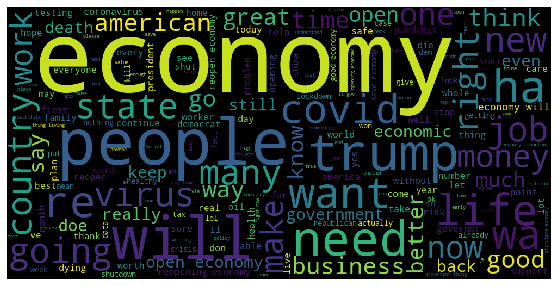

In [125]:
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
k= (' '.join(df_positive['text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [126]:
df_negative = clean_df[clean_df.target=='negative']
df_negative.head()

,text,target,clean_len
0,to help the economy share this post make it go...,negative,236
3,slavemaster speak this is disgraceful but not ...,negative,244
4,be in india and do something productive to imp...,negative,261
5,palin death panel are alive and well in pro li...,negative,145
8,they lied about aid and they lying about this ...,negative,259


(-0.5, 999.5, 499.5, -0.5)

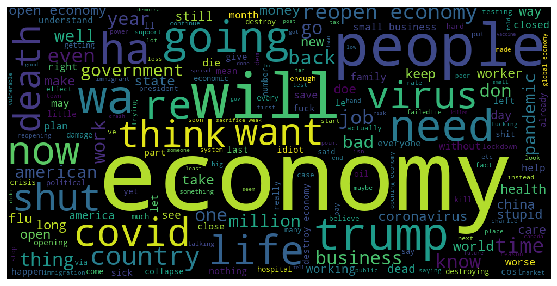

In [127]:
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
k= (' '.join(df_negative['text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Checking the length of cleaned text:**

In [14]:
clean_df['clean_len'] = [len(t) for t in clean_df.text]
clean_df

,text,target,clean_len
0,he is anti trump that is the problem he is bas...,neutral,88
1,when the crap economy wreck these local econom...,negative,210
2,all really spending money on the opposite sex ...,positive,67
3,trump reelection bus lends it support to the l...,neutral,200
4,other country are putting their economy into c...,negative,259
...,...,...,...
1995,well if you put human life after the economy n...,neutral,82
1996,hope for senior in this economy,neutral,31
1997,zero new case in from victoria today keep inte...,positive,111
1998,great so open up the economy again and the gro...,positive,133


In [37]:
clean_df_1=clean_df[:1000]
clean_df_2=clean_df[1000:]

In [15]:
print(f" Maximum length of tweet {clean_df.clean_len.max()}")
print(f" Minimum length of tweet {clean_df.clean_len.min()}")

 Maximum length of tweet 275
 Minimum length of tweet 7


**Assigning dataframe values to dependent and independent variable:**

In [26]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(2000,)
(2000,)


In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1)

**First we need to convert our training and test data into vectors/numerical form using Bag of words model and for that
we are using CountVectorizer as well as TdidfVectorizer:**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
# summarize
#print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(X_train)
vector1 = vectorizer.transform(X_test)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1600, 5937)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Naive Bayes Classification Multinomial model:**
<br />
<center>
<img src="nbMultinomial.jpeg" width=500 />
</center>

In [29]:
from sklearn.naive_bayes import MultinomialNB
CV_vect= MultinomialNB(alpha=.01)

In [30]:
CV_vect.fit(vector, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [31]:
y_pred_CV = CV_vect.predict(vector1)

In [32]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_CV)

0.555

In [33]:
pd.concat([pd.Series(CV_vect.predict(vector1)), y_test.reset_index(
drop=False)], axis=1)

,0,index,target
0,negative,674,negative
1,positive,1699,negative
2,negative,1282,positive
3,neutral,1315,neutral
4,positive,1210,positive
...,...,...,...
395,positive,400,neutral
396,neutral,763,neutral
397,negative,385,negative
398,positive,1667,positive


In [34]:
#transforming the text into vector form 
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [35]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train)

In [36]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [37]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [38]:
nb.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [39]:
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [40]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.465

In [44]:
pd.concat([pd.Series(nb.predict(X_test_dtm)), y_test.reset_index(
drop=False)], axis=1)

,0,index,target
0,positive,674,negative
1,positive,1699,negative
2,positive,1282,positive
3,positive,1315,neutral
4,positive,1210,positive
...,...,...,...
395,positive,400,neutral
396,positive,763,neutral
397,positive,385,negative
398,positive,1667,positive


**Modelling through Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

In [42]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Performing K-fold cross validation on training data and its sentiments with 10 fold cross validation**

In [48]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean()

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.551875

In [43]:
y_pred_lg = logisticRegr.predict(X_test_dtm)

In [44]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.5325

In [51]:
pd.concat([pd.Series(logisticRegr.predict(X_test_dtm)), y_test.reset_index(
drop=False)], axis=1)

,0,index,target
0,positive,674,negative
1,positive,1699,negative
2,positive,1282,positive
3,neutral,1315,neutral
4,positive,1210,positive
...,...,...,...
395,positive,400,neutral
396,positive,763,neutral
397,positive,385,negative
398,positive,1667,positive


**Implementing Linear SVC model**

In [45]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [46]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [47]:
y_pred_svm = svm_clf.predict(X_test_dtm) 

In [48]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, svm_clf.predict(X_test_dtm))  # measure the accuracy of our model on the testing data

0.6125

In [49]:
pd.concat([pd.Series(svm_clf.predict(X_test_dtm)), y_test.reset_index(
drop=False)], axis=1)

,0,index,target
0,positive,674,negative
1,positive,1699,negative
2,positive,1282,positive
3,neutral,1315,neutral
4,positive,1210,positive
...,...,...,...
395,positive,400,neutral
396,positive,763,neutral
397,positive,385,negative
398,positive,1667,positive


**Correlation between daily percentage change and sentiment of that day:**

In [3]:
max_error_count = 4
min_text_length = 3
def is_in_english(quote):
    d = SpellChecker("en_US")
    d.set_text(quote)
    errors = [err.word for err in d]
    return False if ((len(errors) > max_error_count) or len(quote.split()) < min_text_length) else True

In [4]:
Dates=['2020-04-10',
'2020-04-09',
'2020-04-08',
'2020-04-07',
'2020-04-06',
'2020-04-05',
'2020-04-04',
'2020-04-03',
'2020-04-02',
'2020-04-01',
'2020-03-31',
'2020-03-30',
'2020-03-29',
'2020-03-28',
'2020-03-27',
'2020-03-26',
'2020-03-25',
'2020-03-24',
'2020-03-23',
'2020-03-22',
'2020-03-21',
'2020-03-20',
'2020-03-19',
'2020-03-18',
'2020-03-17',
'2020-03-16',
'2020-03-15',
'2020-03-13',
'2020-03-12',
'2020-03-11',
'2020-03-10',
'2020-03-09',
'2020-03-08',
'2020-03-07',
'2020-03-06',
'2020-03-05',
'2020-03-04',
'2020-03-03',
'2020-03-02',
'2020-03-01',
'2020-02-29',
'2020-02-28',
'2020-02-27',
'2020-02-26',
'2020-02-25',
'2020-02-24',
'2020-02-23',
'2020-02-22',
'2020-02-21',
'2020-02-20',
'2020-02-19',
'2020-02-18',
'2020-02-17',
'2020-02-16',
'2020-02-15',
'2020-02-14',
'2020-02-13',
'2020-02-12',
'2020-02-11',
'2020-02-10',
'2020-02-09',
'2020-02-08',
'2020-02-07',
'2020-02-06',
'2020-02-05',
'2020-02-04',
'2020-02-03',
'2020-02-02',
'2020-02-01',
'2020-01-31'
]

In [5]:
tweet_list=[]
for date in Dates:
    #print(date)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('microsoft')\
                                           .setSince("2020-01-01")\
                                           .setUntil(date)\
                                           .setMaxTweets(5)\
                                           .setTopTweets(True)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    #print(len(tweet))
    for t in tweet:
        tweet1 = {}
        if is_in_english(t.text):
            tweet1["name"] = t.username
            tweet1["tweet"]=t.text
            tweet1["retweets"]=t.retweets
            tweet1["location"]=t.geo
            tweet1["created"]=t.date.strftime("%d-%b-%Y")
            tweet1["followers"]=""
            tweet1["is_user_verified"]="true"
            tweet_list.append(tweet1)

In [7]:
tweet_list

[{'name': 'Amoli',
  'tweet': 'I love @Microsoft / @MicrosoftDesign (as if you didn’t know that already). Another very impressive little tidbit - you can now “play” your emails. The media player controls are play/pause, archive and flag. So cool.',
  'retweets': 0,
  'location': '',
  'created': '09-Apr-2020',
  'followers': '',
  'is_user_verified': 'true'},
 {'name': 'JonErlichman',
  'tweet': 'Age when they started companies: Bill Gates-Microsoft: 19 Jeff Bezos-Amazon: 30 Oprah Winfrey-Harpo: 32 Reed Hastings-Netflix: 36 Doris Fisher-Gap: 37 Vera Wang-Vera Wang: 40 Sam Walton-Walmart: 44 Bernie Marcus-Home Depot: 50 Gordon Bowker-Starbucks: 51 Charles Flint-IBM: 61',
  'retweets': 205,
  'location': '',
  'created': '09-Apr-2020',
  'followers': '',
  'is_user_verified': 'true'},
 {'name': 'TheSolariReport',
  'tweet': 'My next question about Bill Gates is how much of the $21 trillion that went missing from the US government was helped by back doors in Microsoft software and how muc

In [127]:
#Converting list into data frame
import pandas as pd
df = pd.DataFrame(tweet_list) 
df

,name,tweet,retweets,location,created,followers,is_user_verified
0,Amoli,I love @Microsoft / @MicrosoftDesign (as if yo...,0,,09-Apr-2020,,true
1,JonErlichman,Age when they started companies: Bill Gates-Mi...,205,,09-Apr-2020,,true
2,TheSolariReport,My next question about Bill Gates is how much ...,338,,09-Apr-2020,,true
3,Michael31061457,I live in one of the richest school districts ...,3,,08-Apr-2020,,true
4,Apex_Zy,It was during this time in 2014 that @Microsof...,2,,08-Apr-2020,,true
...,...,...,...,...,...,...,...
216,shonadelie,Mind-blowing to see how far and wide #Humansof...,2,,31-Jan-2020,,true
217,merisahw,It was movie night hosted by @Microsoft's Crim...,1,,31-Jan-2020,,true
218,HealthITNews,.@Microsoft on Tuesday announced AI for Health...,7,,30-Jan-2020,,true
219,RESCUEorg,We are absolutely honored! Thank you @Microsof...,4,,30-Jan-2020,,true


In [128]:
df['created'] =  pd.to_datetime(df['created']).dt.strftime('%Y-%m-%d')
df

,name,tweet,retweets,location,created,followers,is_user_verified
0,Amoli,I love @Microsoft / @MicrosoftDesign (as if yo...,0,,2020-04-09,,true
1,JonErlichman,Age when they started companies: Bill Gates-Mi...,205,,2020-04-09,,true
2,TheSolariReport,My next question about Bill Gates is how much ...,338,,2020-04-09,,true
3,Michael31061457,I live in one of the richest school districts ...,3,,2020-04-08,,true
4,Apex_Zy,It was during this time in 2014 that @Microsof...,2,,2020-04-08,,true
...,...,...,...,...,...,...,...
216,shonadelie,Mind-blowing to see how far and wide #Humansof...,2,,2020-01-31,,true
217,merisahw,It was movie night hosted by @Microsoft's Crim...,1,,2020-01-31,,true
218,HealthITNews,.@Microsoft on Tuesday announced AI for Health...,7,,2020-01-30,,true
219,RESCUEorg,We are absolutely honored! Thank you @Microsof...,4,,2020-01-30,,true


**Function to clean tweets by removing links and special characters**

In [99]:
import re
def clean_tweet(tweet):
    """ Utility function to clean tweet text by removing links, special characters using simple regex statements. """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+://\S+)", " ", tweet).split())

**Function to analyse sentiments of tweet by using "sentiment" method of Textblob**

In [96]:
def analyse_tweet(tweet):
    """ Utility function to classify sentiment of passed tweet using textblob's sentiment method """
    clean_tweet(tweet)
    # create TextBlob object of passed tweet text
    tweet_analysis = TextBlob(tweet)
    return tweet_analysis.sentiment.polarity

In [123]:
def get_tweet_sentiment(tweet):
    tweet_polarity = analyse_tweet(tweet)
    # set sentiment
    if tweet_polarity > 0:
        return 'positive'
    if tweet_polarity==0:
        return 'neutral'
    else:
        return 'negative'

In [124]:
def clean_tweet_data(tweets):
    # Drop unwanted columns
    tweets = tweets.drop('followers',1)
    tweets = tweets.drop('is_user_verified',1)
    # Convert 'Time' column to datetime and strip time information.
    #tweets['Time'] = pd.to_datetime(tweets['Time']).dt.date
    # Consider only dates between a range
    #tweets = filter_by_daterange(tweets)
    #print(tweets)
    # Add sentiment of the tweet to the data.
    #tweets['Sentiment'] = tweets.apply(lambda row : get_tweet_sentiment(row['tweet']), axis=1)
    tweets['Sentiment'] = tweets.apply(lambda row : get_tweet_sentiment(row['tweet']), axis=1)
    tweets_sentiment = tweets[['created', 'Sentiment']].copy() 
    #print(tweets_sentiment)
    # Will consider maximum tweet sentiment as the sentiment of the day.
    #tweets_sentiment = tweets_sentiment.groupby(tweets_sentiment.created)\
     #                   .agg(lambda x: x.value_counts().index[0])
    tweets_sentiment = tweets_sentiment.groupby(tweets_sentiment.created)\
                         .agg({'Sentiment':(lambda x:x.value_counts().index[0])}).reset_index()
                         #.agg(lambda x: x.value_counts().index[0])
    #print(tweets_sentiment)
    #tweets_sentiment.sort_values(by=['created'], inplace=True)
    return tweets_sentiment

In [125]:
df.columns

Index(['name', 'tweet', 'retweets', 'location', 'created', 'followers',
       'is_user_verified'],
      dtype='object')

In [129]:
cleaned_tweets_with_sentiment = clean_tweet_data(df)
cleaned_tweets_with_sentiment

,created,Sentiment
0,2020-01-30,negative
1,2020-01-31,positive
2,2020-02-01,positive
3,2020-02-02,positive
4,2020-02-03,negative
...,...,...
63,2020-04-05,neutral
64,2020-04-06,neutral
65,2020-04-07,positive
66,2020-04-08,negative


In [130]:
cleaned_tweets_with_sentiment['created'] = cleaned_tweets_with_sentiment['created'].astype('datetime64[ns]') 


In [133]:
#cleaned_tweets_with_sentiment['Shift_Close'] = cleaned_tweets_with_sentiment['Sentiment'].shift(1)
#cleaned_tweets_with_sentiment=cleaned_tweets_with_sentiment.drop(['Shift_Close'],axis=1)
cleaned_tweets_with_sentiment

,created,Sentiment
0,2020-01-30,negative
1,2020-01-31,positive
2,2020-02-01,positive
3,2020-02-02,positive
4,2020-02-03,negative
...,...,...
63,2020-04-05,neutral
64,2020-04-06,neutral
65,2020-04-07,positive
66,2020-04-08,negative


In [437]:
cleaned_tweets_with_sentiment.dtypes

created      datetime64[ns]
Sentiment           float64
dtype: object

**Using data file of Microsoft stock**

In [134]:
MS_stock_df = pd.read_csv("MSFTP.csv")
MS_stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-01-2020,174.050003,174.050003,170.789993,172.779999,172.309357,51597500
1,31-01-2020,172.210007,172.399994,169.580002,170.229996,169.766296,36142700
2,01-02-2020,171.429993,175.500000,170.399994,175.380005,173.904999,30149100
3,02-02-2020,171.429993,175.500000,170.399994,175.380005,173.904999,30149100
4,03-02-2020,170.429993,174.500000,170.399994,174.380005,173.904999,30149100
5,04-02-2020,177.139999,180.639999,176.309998,180.119995,179.629364,36433300
6,05-02-2020,184.029999,184.199997,178.410004,179.899994,179.409958,39186300
7,06-02-2020,180.970001,183.820007,180.059998,183.630005,183.129807,27751400
8,07-02-2020,182.850006,185.630005,182.479996,183.889999,183.389099,33529100
9,10-02-2020,183.580002,188.839996,183.250000,188.699997,188.185989,35844300


**Function for cleaning stock data**

In [119]:
def clean_stock_data(stock_data):
    #Remove null stock data.
    stock_data = stock_data.dropna()
    #Convert 'Date' column to datetime and strip time information.
    stock_data['created'] = pd.to_datetime(stock_data["Date"], format="%d-%m-%Y",dayfirst=True)
    stock_data = stock_data.drop('Date',1)
    #Consider only dates between a range
    #stock_data = filter_by_daterange(stock_data)    
    #Calculate daily change percentage
    stock_data['daily_percentage_change'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100
    #stock_daily_change = stock_data[['Time', 'daily_percentage_change']].copy()
    #stock_data.sort_values(by=['Date'], inplace=True)
    return stock_data

In [135]:
MS_stock1_df = clean_stock_data(MS_stock_df)
MS_stock1_df

,Open,High,Low,Close,Adj Close,Volume,created,daily_percentage_change
0,174.050003,174.050003,170.789993,172.779999,172.309357,51597500,2020-01-30,-0.729678
1,172.210007,172.399994,169.580002,170.229996,169.766296,36142700,2020-01-31,-1.149765
2,171.429993,175.500000,170.399994,175.380005,173.904999,30149100,2020-02-01,2.304155
3,171.429993,175.500000,170.399994,175.380005,173.904999,30149100,2020-02-02,2.304155
4,170.429993,174.500000,170.399994,174.380005,173.904999,30149100,2020-02-03,2.317674
5,177.139999,180.639999,176.309998,180.119995,179.629364,36433300,2020-02-04,1.682283
6,184.029999,184.199997,178.410004,179.899994,179.409958,39186300,2020-02-05,-2.244202
7,180.970001,183.820007,180.059998,183.630005,183.129807,27751400,2020-02-06,1.469859
8,182.850006,185.630005,182.479996,183.889999,183.389099,33529100,2020-02-07,0.568768
9,183.580002,188.839996,183.250000,188.699997,188.185989,35844300,2020-02-10,2.788972


In [59]:
MS_stock1_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
count,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,51.000000
mean,164.376154,168.277500,160.972115,164.728077,164.547770,5.820834e+07,0.000311
std,15.316131,13.497303,15.929967,15.202389,15.024475,2.079458e+07,0.049378
min,137.009995,140.570007,132.520004,135.419998,135.419998,2.314950e+07,-0.147390
25%,151.832501,157.619999,150.007496,153.780003,153.780003,3.860532e+07,-0.026681
50%,165.860001,168.684998,162.769997,165.135002,165.135002,5.670695e+07,-0.001221
75%,174.934998,176.785000,172.169994,176.182503,175.076248,7.352538e+07,0.022473
max,190.649994,190.699997,186.470001,188.699997,188.185989,9.707360e+07,0.142169


In [442]:
cleaned_tweets_with_sentiment.columns

Index(['created', 'Sentiment'], dtype='object')

In [443]:
MS_stock1_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'created'], dtype='object')

**Merging datasets of sentiment and stock data**

In [137]:
sentiment_stock_MS_df = pd.merge(cleaned_tweets_with_sentiment, MS_stock1_df, on='created', how='inner')
#sentiment_stock_MS_df = sentiment_stock_MS_df.drop(['Shift_Close'],axis=1)
#float("9.142857e-01")
# and now with 'rounding'
#"{:.8f}".format(float("9.142857e-01"))
#import decimal
#>>> tmp = decimal.Decimal('8.99284722486562e-02')
def covert(s):
    for x in sentiment_stock_MS_df['Sentiment']:
        x=float(x)
        sentiment_stock_MS_df[x]="{:.8f}".format(float(x))
        print(x)

#sentiment_stock_MS_df['Sentiment']=decimal.Decimal(sentiment_stock_MS_df['Sentiment'])
#sentiment_stock_MS_df['Sentiment']=sentiment_stock_MS_df['Sentiment'].apply(lambda x: '%.6f' % x)
sentiment_stock_MS_df

,created,Sentiment,Open,High,Low,Close,Adj Close,Volume,daily_percentage_change
0,2020-01-30,negative,174.050003,174.050003,170.789993,172.779999,172.309357,51597500,-0.729678
1,2020-01-31,positive,172.210007,172.399994,169.580002,170.229996,169.766296,36142700,-1.149765
2,2020-02-01,positive,171.429993,175.500000,170.399994,175.380005,173.904999,30149100,2.304155
3,2020-02-02,positive,171.429993,175.500000,170.399994,175.380005,173.904999,30149100,2.304155
4,2020-02-03,negative,170.429993,174.500000,170.399994,174.380005,173.904999,30149100,2.317674
5,2020-02-04,positive,177.139999,180.639999,176.309998,180.119995,179.629364,36433300,1.682283
6,2020-02-05,positive,184.029999,184.199997,178.410004,179.899994,179.409958,39186300,-2.244202
7,2020-02-06,positive,180.970001,183.820007,180.059998,183.630005,183.129807,27751400,1.469859
8,2020-02-07,positive,182.850006,185.630005,182.479996,183.889999,183.389099,33529100,0.568768
9,2020-02-10,negative,183.580002,188.839996,183.250000,188.699997,188.185989,35844300,2.788972


In [138]:
def make_sentiment_column_categorical(tweet_sentiment_with_price_change):
    #Change 'Sentiment' column to categorical column.
    tweet_sentiment_with_price_change['Sentiment'] = tweet_sentiment_with_price_change['Sentiment'].astype('category')
    tweet_sentiment_with_price_change['Sentiment'] = tweet_sentiment_with_price_change['Sentiment'].cat.codes
    return tweet_sentiment_with_price_change

In [140]:
sentiment_stock_MS_df = make_sentiment_column_categorical(sentiment_stock_MS_df)
sentiment = sentiment_stock_MS_df.Sentiment.values.reshape(-1, 1)
price_change = sentiment_stock_MS_df.daily_percentage_change.values.reshape(-1, 1)

In [143]:
price_change

array([[-0.72967767],
       [-1.14976536],
       [ 2.30415456],
       [ 2.30415456],
       [ 2.31767421],
       [ 1.68228295],
       [-2.24420204],
       [ 1.46985908],
       [ 0.56876837],
       [ 2.78897208],
       [-3.25727364],
       [-0.46879782],
       [ 0.34411459],
       [ 1.14597872],
       [ 0.8727951 ],
       [-0.41476072],
       [-1.35330251],
       [-2.50041057],
       [ 1.85968584],
       [-3.51893806],
       [-3.14720413],
       [ 6.29879322],
       [ 4.52482916],
       [-5.34522891],
       [ 0.13249081],
       [-0.63956337],
       [-0.25165894],
       [ 1.74506445],
       [-2.2274549 ],
       [-4.29456633],
       [-3.27143   ],
       [ 4.69286214],
       [ 1.73912609],
       [-0.04202353],
       [-5.92465342],
       [-0.75176924],
       [ 3.1930407 ],
       [-1.33638167],
       [ 5.19542272],
       [-1.35090807],
       [ 5.11020329],
       [-1.06021773],
       [-0.58169869],
       [ 2.23890029],
       [-0.81882911],
       [ 3

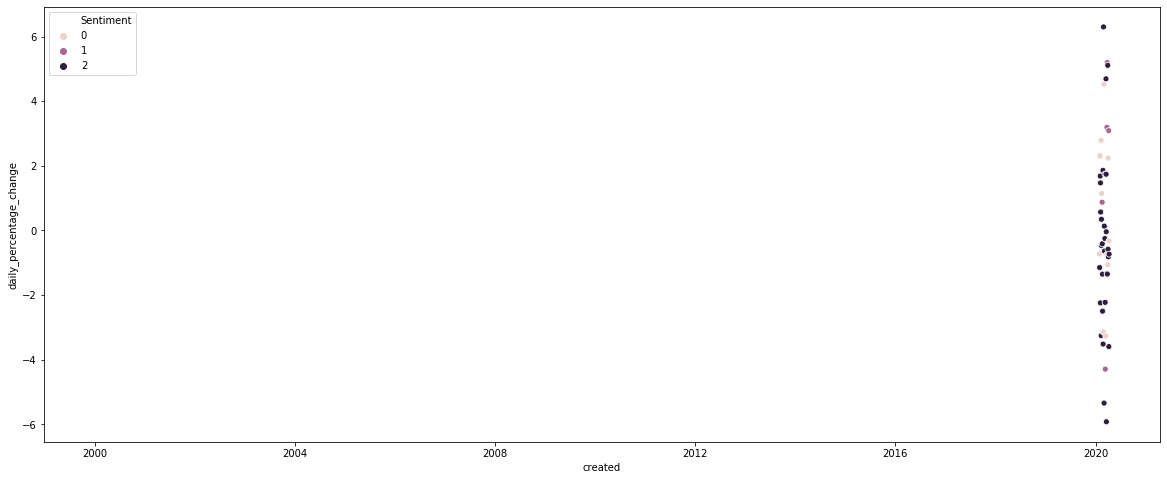

In [153]:
#sentiment_stock_MS_df.plot(x='Sentiment', y='daily_percentage_change',style='o')
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.scatterplot(x=sentiment_stock_MS_df['created'], y=sentiment_stock_MS_df['daily_percentage_change'], 
                data=sentiment_stock_MS_df,hue=sentiment_stock_MS_df['Sentiment']);

**Plotting of values**

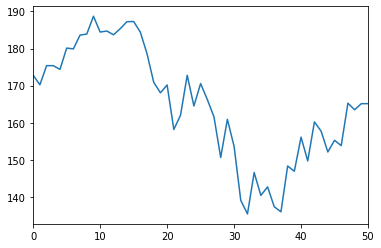

In [445]:
close = sentiment_stock_MS_df['Close']
close.plot()

In [446]:
sentiment_stock_MS_df['Close'].describe()

count     51.000000
mean     164.843726
std       15.330541
min      135.419998
25%      153.730004
50%      165.139999
75%      176.985001
max      188.699997
Name: Close, dtype: float64

# Random Forest Regression Model
<br />
<center>
<img src="TimeSeriesImg.jpeg" width=500 />
</center>

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(sentiment, price_change, random_state=42)

In [145]:
X_train

array([[2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [1]], dtype=int8)

In [146]:
y_train

array([[ 0.56876837],
       [ 2.30415456],
       [-2.24420204],
       [ 5.11020329],
       [-1.06021773],
       [-3.59690497],
       [-0.41476072],
       [ 2.78897208],
       [-1.35330251],
       [ 0.13249081],
       [-0.04202353],
       [-3.27143   ],
       [-0.72967767],
       [ 2.23890029],
       [ 1.73912609],
       [ 1.68228295],
       [-4.29456633],
       [-0.46879782],
       [ 3.1930407 ],
       [-1.14976536],
       [ 6.29879322],
       [ 2.30415456],
       [-1.33638167],
       [-0.75176924],
       [-5.34522891],
       [-1.35090807],
       [-3.25727364],
       [ 4.52482916],
       [ 1.85968584],
       [-0.73335056],
       [-3.14720413],
       [ 1.46985908],
       [-0.58169869],
       [ 0.8727951 ],
       [-2.2274549 ],
       [ 5.19542272]])

In [147]:
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [148]:
rf_model.score(X_test, y_test)

0.06691899647682287

In [149]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=False)

[('Sentiment', 1.0)]